In [2]:
import os

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np


In [6]:
import seaborn as sns

In [7]:
os.chdir("c:\hotel")

In [8]:
df_bookings = pd.read_csv("fact_bookings.csv")
df_bookings.head(10)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,NaN,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-2022,01-05-2022,03-05-2022,2.0,RT1,logtrip,NaN,No Show,9100,9100
8,May012216558RT19,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,tripster,NaN,Checked Out,9100,9100
9,May012216558RT110,16558,28-04-2022,01-05-2022,02-05-2022,1.0,RT1,others,4.0,Checked Out,9100,9100


In [9]:
df_bookings.drop("ratings_given",axis=1,inplace=True)
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,29-07-2022,31-07-2022,03-08-2022,1.0,RT4,makeyourtrip,Checked Out,32300,32300
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,-4.0,RT4,logtrip,Checked Out,38760,38760
134587,Jul312217564RT48,17564,30-07-2022,31-07-2022,02-08-2022,1.0,RT4,tripster,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-2022,31-07-2022,01-08-2022,2.0,RT4,logtrip,Checked Out,32300,32300


In [10]:
df_bookings.shape

(134590, 11)

In [11]:
df_rooms=pd.read_csv("dim_rooms.csv")
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [12]:
room_category_counts = df_bookings['room_category'].value_counts()
room_category_counts

room_category
RT2    49505
RT1    38446
RT3    30566
RT4    16073
Name: count, dtype: int64

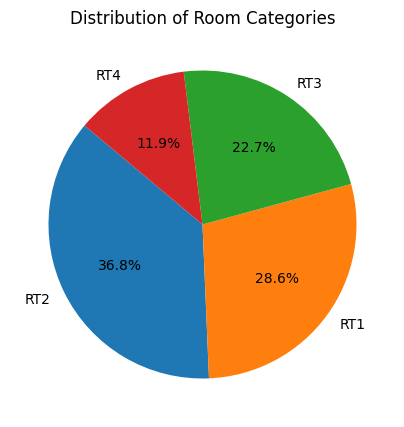

In [13]:
plt.figure(figsize=(5,5))
plt.pie(room_category_counts,labels=room_category_counts.index, autopct="%1.1f%%",startangle=140)
plt.title('Distribution of Room Categories')
plt.show()  

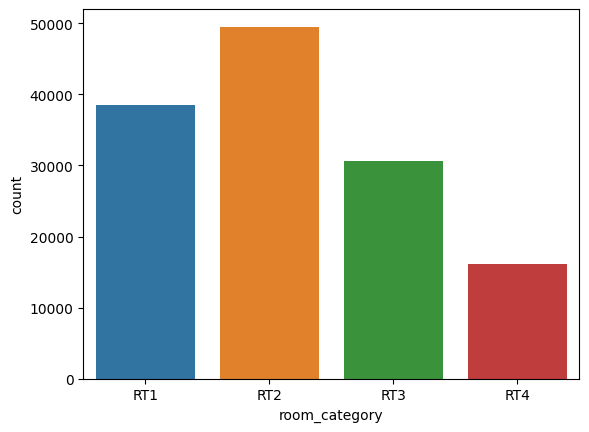

In [14]:
 room_category= sns.countplot(x=df_bookings['room_category'], data=df_bookings)

In [15]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [16]:
df_bookings.booking_platform.value_counts()

booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

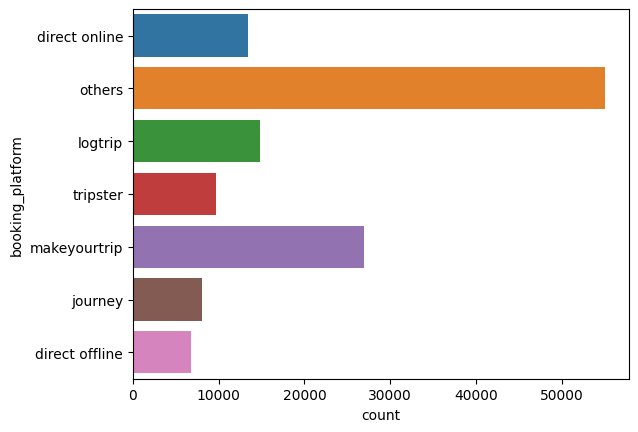

In [17]:
 platform_category= sns.countplot(y=df_bookings['booking_platform'], data=df_bookings)

In [18]:
df_bookings.describe()

,property_id,no_guests,revenue_generated,revenue_realized
count,134590.000000,134587.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,1.537805e+04,12696.123256
std,1093.055847,1.034885,9.303604e+04,6928.108124
min,16558.000000,-17.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,2.856000e+07,45220.000000


In [19]:
df_date =pd.read_csv("dim_date.csv")
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May-22,W 19,weekend
1,02-May-22,May-22,W 19,weekeday
2,03-May-22,May-22,W 19,weekeday
3,04-May-22,May-22,W 19,weekeday
4,05-May-22,May-22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul-22,W 31,weekeday
88,28-Jul-22,Jul-22,W 31,weekeday
89,29-Jul-22,Jul-22,W 31,weekeday
90,30-Jul-22,Jul-22,W 31,weekend


In [20]:
df_hotels =pd.read_csv("dim_hotels.csv")
df_hotels

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi
5,16563,Atliq Palace,Business,Delhi
6,17558,Atliq Grands,Luxury,Mumbai
7,17559,Atliq Exotica,Luxury,Mumbai
8,17560,Atliq City,Business,Mumbai
9,17561,Atliq Blu,Luxury,Mumbai


In [21]:
city_counts = df_hotels['city'].value_counts()
city_counts

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

In [22]:
df_hotels.city.value_counts().sort_values()    

city
Delhi        5
Hyderabad    6
Bangalore    6
Mumbai       8
Name: count, dtype: int64

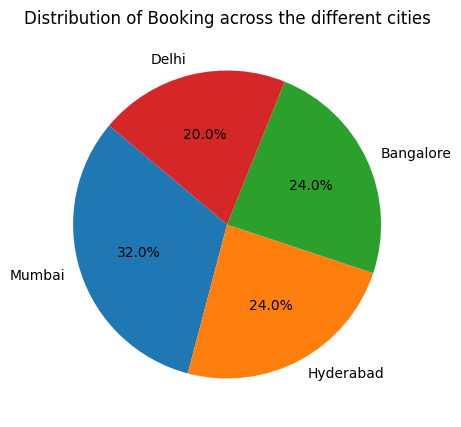

In [23]:

plt.figure(figsize=(5,5))
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Booking across the different cities')
plt.show() 


In [24]:
df_agg_bookings = pd.read_csv("fact_aggregated_bookings.csv")
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30.0
1,19562,01-May-22,RT1,28,30.0
2,19563,01-May-22,RT1,23,30.0
3,17558,01-May-22,RT1,30,19.0
4,16558,01-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [25]:
df_hotels.shape

(25, 4)

In [26]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [27]:
df_agg_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30.0
1,19562,01-May-22,RT1,28,30.0
2,19563,01-May-22,RT1,23,30.0
3,17558,01-May-22,RT1,30,19.0
4,16558,01-May-22,RT1,18,19.0
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18.0
9196,16559,31-Jul-22,RT4,13,18.0
9197,17558,31-Jul-22,RT4,3,6.0
9198,19563,31-Jul-22,RT4,3,6.0


In [28]:
np.unique(df_agg_bookings["property_id"])

array([16558, 16559, 16560, 16561, 16562, 16563, 17558, 17559, 17560,
       17561, 17562, 17563, 17564, 18558, 18559, 18560, 18561, 18562,
       18563, 19558, 19559, 19560, 19561, 19562, 19563], dtype=int64)

In [29]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum() 


property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

In [30]:
df_agg_bookings[df_agg_bookings.successful_bookings > df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,01-May-22,RT1,30,19.0
12,16563,01-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,02-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [31]:
df_agg_bookings.capacity.max()

50.0

In [32]:
df_agg_bookings[df_agg_bookings.capacity == df_agg_bookings.capacity.max()] 

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,01-May-22,RT2,38,50.0
128,17558,02-May-22,RT2,27,50.0
229,17558,03-May-22,RT2,26,50.0
328,17558,04-May-22,RT2,27,50.0
428,17558,05-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


**DATA CLEANING**

In [33]:
df_bookings.describe()

,property_id,no_guests,revenue_generated,revenue_realized
count,134590.000000,134587.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,1.537805e+04,12696.123256
std,1093.055847,1.034885,9.303604e+04,6928.108124
min,16558.000000,-17.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,2.856000e+07,45220.000000


In [34]:
df_bookings[df_bookings.no_guests <= 0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-2022,01-05-2022,02-05-2022,-3.0,RT1,direct online,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-2022,01-05-2022,02-05-2022,-2.0,RT1,others,Cancelled,9100,3640
17924,May122218559RT44,18559,12-05-2022,12-05-2022,14-05-2022,-10.0,RT4,direct online,No Show,20900,20900
18020,May122218561RT22,18561,08-05-2022,12-05-2022,14-05-2022,-12.0,RT2,makeyourtrip,Cancelled,9000,3600
18119,May122218562RT311,18562,05-05-2022,12-05-2022,17-05-2022,-6.0,RT3,direct offline,Checked Out,16800,16800
18121,May122218562RT313,18562,10-05-2022,12-05-2022,17-05-2022,-4.0,RT3,direct online,Cancelled,14400,5760
56715,Jun082218562RT12,18562,05-06-2022,08-06-2022,13-06-2022,-17.0,RT1,others,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-2022,20-07-2022,22-07-2022,-1.0,RT2,others,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-2022,31-07-2022,01-08-2022,-4.0,RT4,logtrip,Checked Out,38760,38760


In [35]:
df_bookings = df_bookings[df_bookings.no_guests >= 0]    
df_bookings.shape

(134578, 11)

In [36]:
df_bookings.revenue_generated.min()    

6500

In [37]:
df_bookings.revenue_generated.max()

28560000

In [38]:
average = df_bookings.revenue_generated.mean()
print(average)     

15378.036937686695


In [39]:
std = df_bookings.revenue_generated.std()
print(std)        

93040.1549314641


In [40]:
highest_limit =  average + std *3        #third degree of standard deviation
print(highest_limit)

294498.50173207896


In [41]:
lowest_limit = average +  std * -3 
print(lowest_limit)

-263742.4278567056


In [42]:
df_bookings[df_bookings.revenue_generated < 0] #All are positive(Empty)


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,booking_status,revenue_generated,revenue_realized


In [43]:
df_bookings[df_bookings.revenue_generated > highest_limit] 

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-2022,01-05-2022,04-05-2022,2.0,RT1,logtrip,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-2022,01-05-2022,02-05-2022,6.0,RT3,direct online,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-2022,01-05-2022,04-05-2022,2.0,RT2,direct offline,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-2022,28-07-2022,29-07-2022,2.0,RT2,direct online,Checked Out,10000000,12600


In [44]:
df_bookings=df_bookings[df_bookings.revenue_generated < highest_limit]
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,Checked Out,10920,10920
5,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-2022,01-05-2022,06-05-2022,2.0,RT1,others,Cancelled,9100,3640
7,May012216558RT18,16558,26-04-2022,01-05-2022,03-05-2022,2.0,RT1,logtrip,No Show,9100,9100
...,...,...,...,...,...,...,...,...,...,...,...
134584,Jul312217564RT45,17564,30-07-2022,31-07-2022,01-08-2022,2.0,RT4,others,Checked Out,32300,32300
134585,Jul312217564RT46,17564,29-07-2022,31-07-2022,03-08-2022,1.0,RT4,makeyourtrip,Checked Out,32300,32300
134587,Jul312217564RT48,17564,30-07-2022,31-07-2022,02-08-2022,1.0,RT4,tripster,Cancelled,32300,12920
134588,Jul312217564RT49,17564,29-07-2022,31-07-2022,01-08-2022,2.0,RT4,logtrip,Checked Out,32300,32300


In [45]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [46]:
higher_limit = df_bookings.revenue_realized.mean() +3 * df_bookings.revenue_realized.std()
higher_limit

33479.358661845814

In [47]:
df_bookings[df_bookings.revenue_realized > higher_limit]


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-2022,01-05-2022,07-05-2022,4.0,RT4,others,Checked Out,38760,38760
139,May012216559RT43,16559,01-05-2022,01-05-2022,02-05-2022,6.0,RT4,tripster,Checked Out,45220,45220
143,May012216559RT47,16559,28-04-2022,01-05-2022,03-05-2022,3.0,RT4,others,Checked Out,35530,35530
149,May012216559RT413,16559,24-04-2022,01-05-2022,07-05-2022,5.0,RT4,logtrip,Checked Out,41990,41990
222,May012216560RT45,16560,30-04-2022,01-05-2022,03-05-2022,5.0,RT4,others,Checked Out,34580,34580
...,...,...,...,...,...,...,...,...,...,...,...
134328,Jul312219560RT49,19560,31-07-2022,31-07-2022,02-08-2022,6.0,RT4,direct online,Checked Out,39900,39900
134331,Jul312219560RT412,19560,31-07-2022,31-07-2022,01-08-2022,6.0,RT4,others,Checked Out,39900,39900
134467,Jul312219562RT45,19562,28-07-2022,31-07-2022,01-08-2022,6.0,RT4,makeyourtrip,Checked Out,39900,39900
134474,Jul312219562RT412,19562,25-07-2022,31-07-2022,06-08-2022,5.0,RT4,direct offline,Checked Out,37050,37050


In [48]:
df_bookings[df_bookings.room_category == "RT4"].revenue_realized.describe() 

count    16071.000000
mean     23439.308444
std       9048.599076
min       7600.000000
25%      19000.000000
50%      26600.000000
75%      32300.000000
max      45220.000000
Name: revenue_realized, dtype: float64

In [49]:
  23439 + 3 * 9048

50583

In [50]:
df_bookings.isnull().sum() 

booking_id           0
property_id          0
booking_date         0
check_in_date        0
checkout_date        0
no_guests            0
room_category        0
booking_platform     0
booking_status       0
revenue_generated    0
revenue_realized     0
dtype: int64

**DATA TRANSFORMATION**

<Axes: xlabel='revenue_generated', ylabel='Count'>

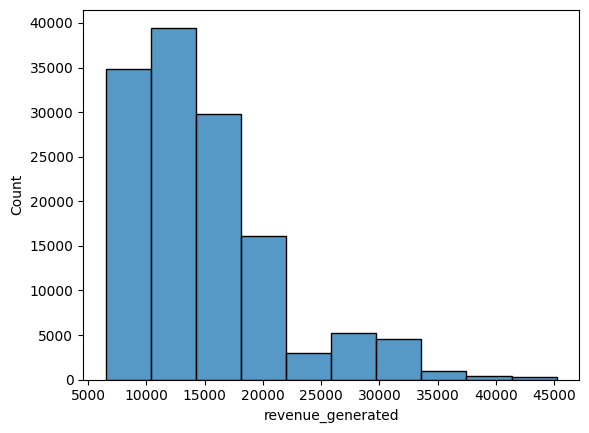

In [51]:
sns.histplot(df_bookings['revenue_generated'], bins=10, kde=False) 

In [52]:
df_agg_bookings.head() 

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30.0
1,19562,01-May-22,RT1,28,30.0
2,19563,01-May-22,RT1,23,30.0
3,17558,01-May-22,RT1,30,19.0
4,16558,01-May-22,RT1,18,19.0


In [53]:
df_agg_bookings["occ_pct"] = round((df_agg_bookings["successful_bookings"] / df_agg_bookings["capacity"] ) *100,2)
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,01-May-22,RT1,25,30.0,83.33
1,19562,01-May-22,RT1,28,30.0,93.33
2,19563,01-May-22,RT1,23,30.0,76.67
3,17558,01-May-22,RT1,30,19.0,157.89
4,16558,01-May-22,RT1,18,19.0,94.74


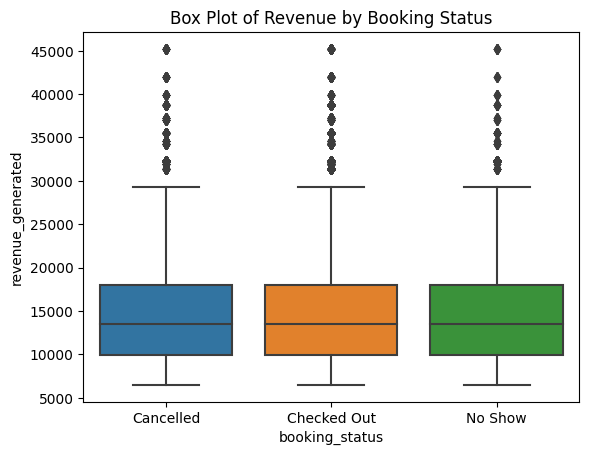

In [54]:
sns.boxplot(x='booking_status', y='revenue_generated', data=df_bookings)
plt.title('Box Plot of Revenue by Booking Status')
plt.show()     

In [55]:
booking_platform_counts = df_bookings['booking_platform'].value_counts()
booking_platform_counts      

booking_platform
others            55061
makeyourtrip      26896
logtrip           14753
direct online     13374
tripster           9630
journey            8106
direct offline     6753
Name: count, dtype: int64

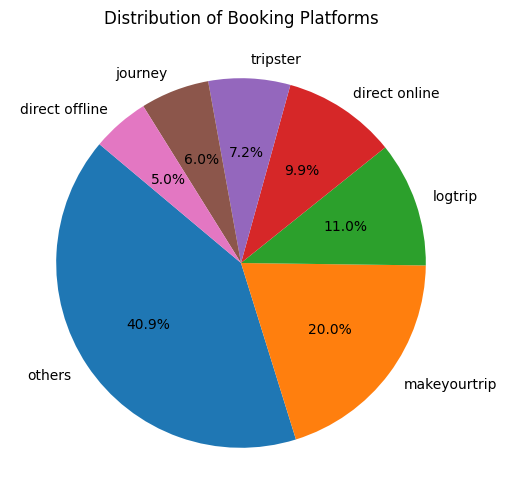

In [56]:
plt.figure(figsize=(6,6))
plt.pie(booking_platform_counts, labels=booking_platform_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Booking Platforms')
plt.show() 

**INSIGHTS GENERATION**

**Average occupancy rate in each of the room category** 

In [57]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean().round(2)    

room_category
RT1    58.22
RT2    58.04
RT3    58.03
RT4    59.30
Name: occ_pct, dtype: float64

In [58]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [59]:
df=pd.merge(df_agg_bookings,df_rooms,left_on="room_category", right_on="room_id")
df.tail(4) 

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
9196,16559,31-Jul-22,RT4,13,18.0,72.22,RT4,Presidential
9197,17558,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9198,19563,31-Jul-22,RT4,3,6.0,50.00,RT4,Presidential
9199,17561,31-Jul-22,RT4,3,4.0,75.00,RT4,Presidential


In [60]:
df.groupby("room_class")["occ_pct"].mean().round(2) 

room_class
Elite           58.04
Premium         58.03
Presidential    59.30
Standard        58.22
Name: occ_pct, dtype: float64

In [61]:
df.drop("room_id",axis = 1, inplace=True)
df.head(4) 

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,01-May-22,RT1,25,30.0,83.33,Standard
1,19562,01-May-22,RT1,28,30.0,93.33,Standard
2,19563,01-May-22,RT1,23,30.0,76.67,Standard
3,17558,01-May-22,RT1,30,19.0,157.89,Standard


**Print average occupancy rate per city**

In [62]:
df_hotels.head(3)     

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [63]:
df= pd.merge(df,df_hotels,on="property_id")
df.head(3) 

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,02-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,03-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai


<Axes: xlabel='city'>

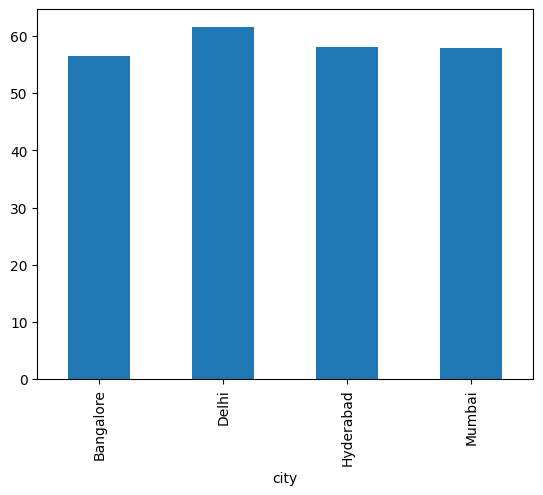

In [64]:
df.groupby("city")["occ_pct"].mean().plot(kind ="bar") 

**When was the occupancy better? weekend or weekdays**

In [65]:
df.head(3)   

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,01-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,02-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai
2,16559,03-May-22,RT1,17,30.0,56.67,Standard,Atliq Exotica,Luxury,Mumbai


In [66]:
df_date

,date,mmm yy,week no,day_type
0,01-May-22,May-22,W 19,weekend
1,02-May-22,May-22,W 19,weekeday
2,03-May-22,May-22,W 19,weekeday
3,04-May-22,May-22,W 19,weekeday
4,05-May-22,May-22,W 19,weekeday
...,...,...,...,...
87,27-Jul-22,Jul-22,W 31,weekeday
88,28-Jul-22,Jul-22,W 31,weekeday
89,29-Jul-22,Jul-22,W 31,weekeday
90,30-Jul-22,Jul-22,W 31,weekend


In [67]:
df = pd.merge(df,df_date,left_on ="check_in_date", right_on = "date")                                                            
df.head(3)                                                  

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,01-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai,01-May-22,May-22,W 19,weekend
1,16559,01-May-22,RT2,35,41.0,85.37,Elite,Atliq Exotica,Luxury,Mumbai,01-May-22,May-22,W 19,weekend
2,16559,01-May-22,RT3,27,32.0,84.38,Premium,Atliq Exotica,Luxury,Mumbai,01-May-22,May-22,W 19,weekend


In [68]:
df.groupby("day_type")["occ_pct"].mean().round(2)    

day_type
weekeday    51.82
weekend     74.24
Name: occ_pct, dtype: float64

**In the month of June, what is the occupancy rate for the different cities**

In [69]:
df["mmm yy"].unique()        

array(['May-22', 'Jun-22', 'Jul-22'], dtype=object)

In [70]:
df_june_22 = df[df["mmm yy"] == "Jun-22"] 
df_june_22.head(3) 

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
3100,16559,01-Jun-22,RT1,14,30.0,46.67,Standard,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun-22,W 23,weekeday
3101,16559,01-Jun-22,RT2,21,41.0,51.22,Elite,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun-22,W 23,weekeday
3102,16559,01-Jun-22,RT3,15,32.0,46.88,Premium,Atliq Exotica,Luxury,Mumbai,01-Jun-22,Jun-22,W 23,weekeday


In [71]:
df_june_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending = False)             

city
Delhi        61.46
Mumbai       57.79
Hyderabad    57.69
Bangalore    55.95
Name: occ_pct, dtype: float64

**Print revenue realized per city**

In [78]:
df_hotels.head(3)                                    

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [79]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on = "property_id") 
df_bookings_all.head(3)                                                            

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-2022,01-05-2022,02-05-2022,2.0,RT1,others,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-2022,01-05-2022,02-05-2022,4.0,RT1,direct online,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,01-05-2022,01-05-2022,03-05-2022,2.0,RT1,others,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [80]:
df_bookings_all.groupby("city")["revenue_realized"].sum()                                       

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**print revenue realized per hotel type**

In [81]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values(ascending=True)  

property_name
Atliq Seasons     66086735
Atliq Grands     211462134
Atliq Bay        259996918
Atliq Blu        260851922
Atliq City       285798439
Atliq Palace     304081863
Atliq Exotica    320258588
Name: revenue_realized, dtype: int64

<Axes: ylabel='revenue_realized'>

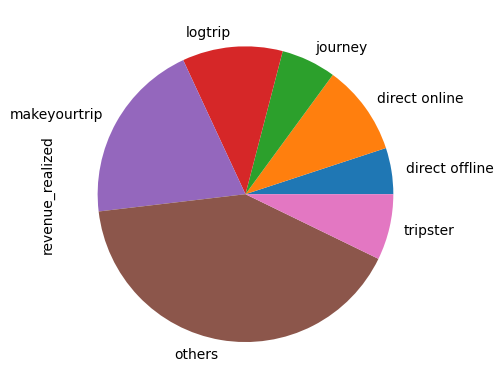

In [82]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")  